In [8]:
import pandas as pd

# Load the uploaded datasets
df21 = pd.read_csv("21년top1000/top_1000_youtubers.csv")
df22 = pd.read_csv("22년top1000/topSubscribed.csv")
df23 = pd.read_csv("23년top1000/Global YouTube Statistics.csv")

# Display the first few rows of each dataframe to understand their structure
df21.head(), df22.head(), df23.head()


(   Rank           username                                        Youtube Url  \
 0     1            tseries  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...   
 1     2          checkgate  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...   
 2     3          PewDiePie  http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...   
 3     4        MrBeast6000  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...   
 4     5  ✿ Kids Diana Show  http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...   
 
                          Name          Category Subscribers Audience Country  \
 0                    T-Series     Music & Dance      220.1M            India   
 1  Cocomelon - Nursery Rhymes         Education      138.6M              NaN   
 2                   PewDiePie         Animation      111.4M    United States   
 3                     MrBeast  Video gamesHumor       98.4M    United States   
 4           ✿ Kids Diana Show     AnimationToys       97.5M              NaN   
 
   Avg. Views Avg.

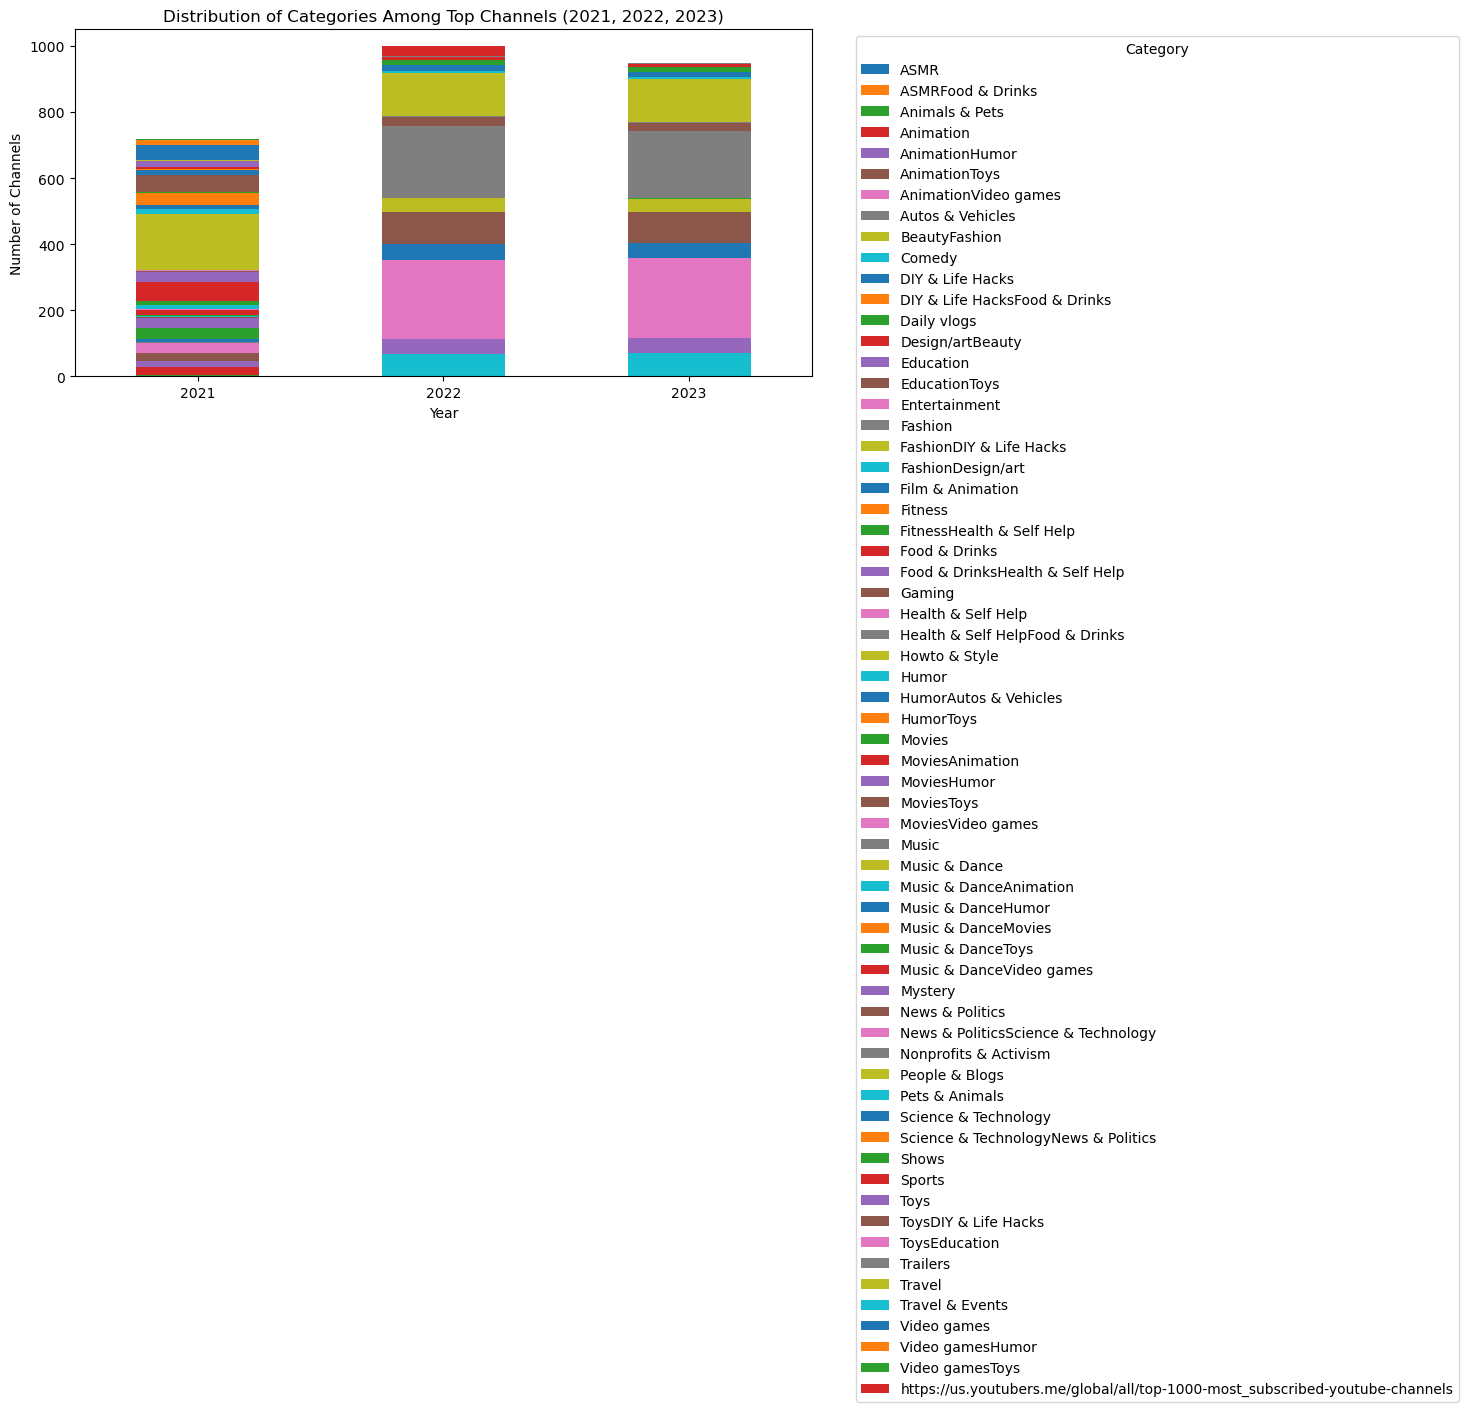

In [3]:
import matplotlib.pyplot as plt

# Analyze the distribution of categories among the top channels for each year

# Extract category information for each year
category_2021 = df21[['Category']].copy()
category_2021.columns = ['Category']
category_2021['Year'] = '2021'

category_2022 = df22[['Category']].copy()
category_2022.columns = ['Category']
category_2022['Year'] = '2022'

category_2023 = df23[['category']].copy()
category_2023.columns = ['Category']
category_2023['Year'] = '2023'

# Combine category information into a single dataframe
category_combined = pd.concat([category_2021, category_2022, category_2023])

# Calculate the distribution of categories for each year
category_distribution = category_combined.groupby(['Year', 'Category']).size().unstack(fill_value=0)

# Plot the distribution of categories for each year
fig, ax = plt.subplots(figsize=(15, 10))
category_distribution.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Distribution of Categories Among Top Channels (2021, 2022, 2023)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Channels')
plt.xticks(rotation=0)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save and display the plot
plt.show()


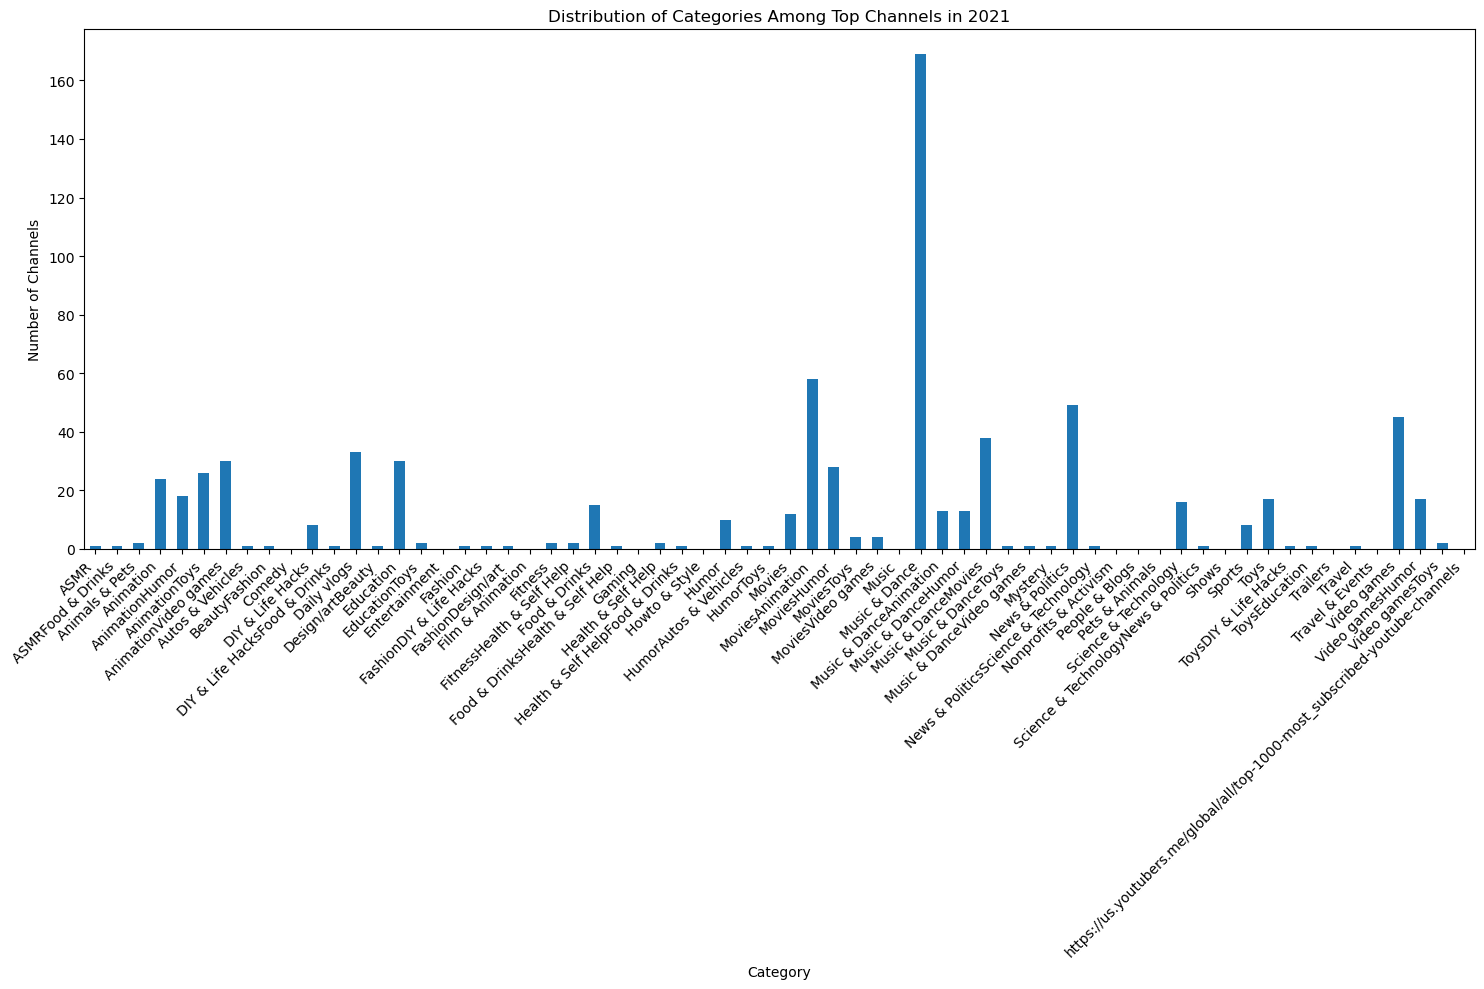

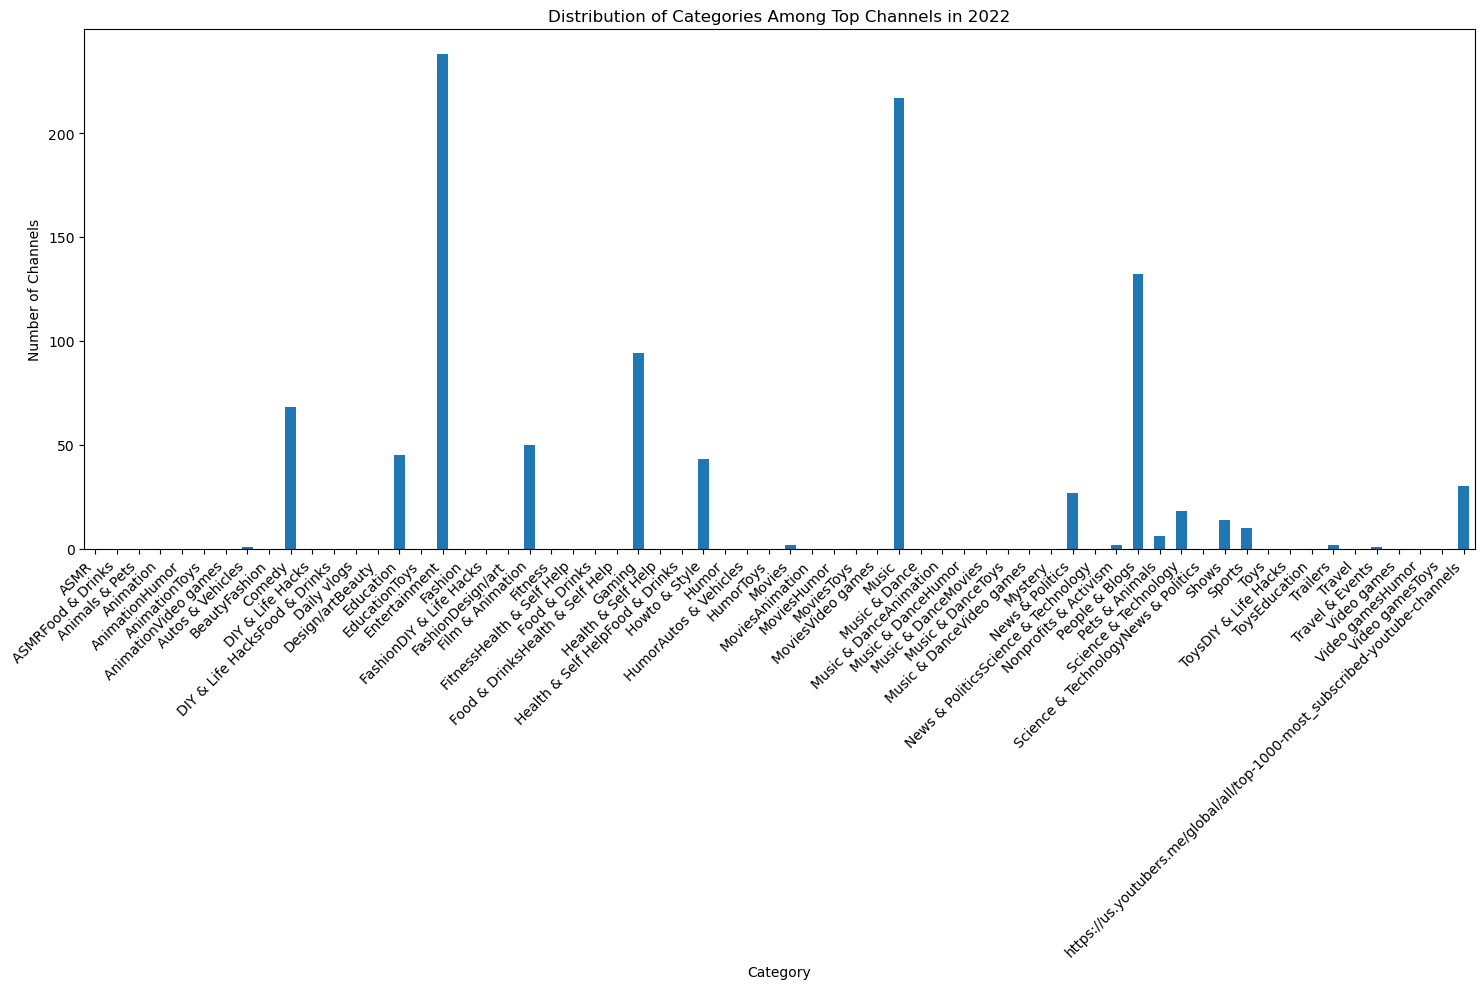

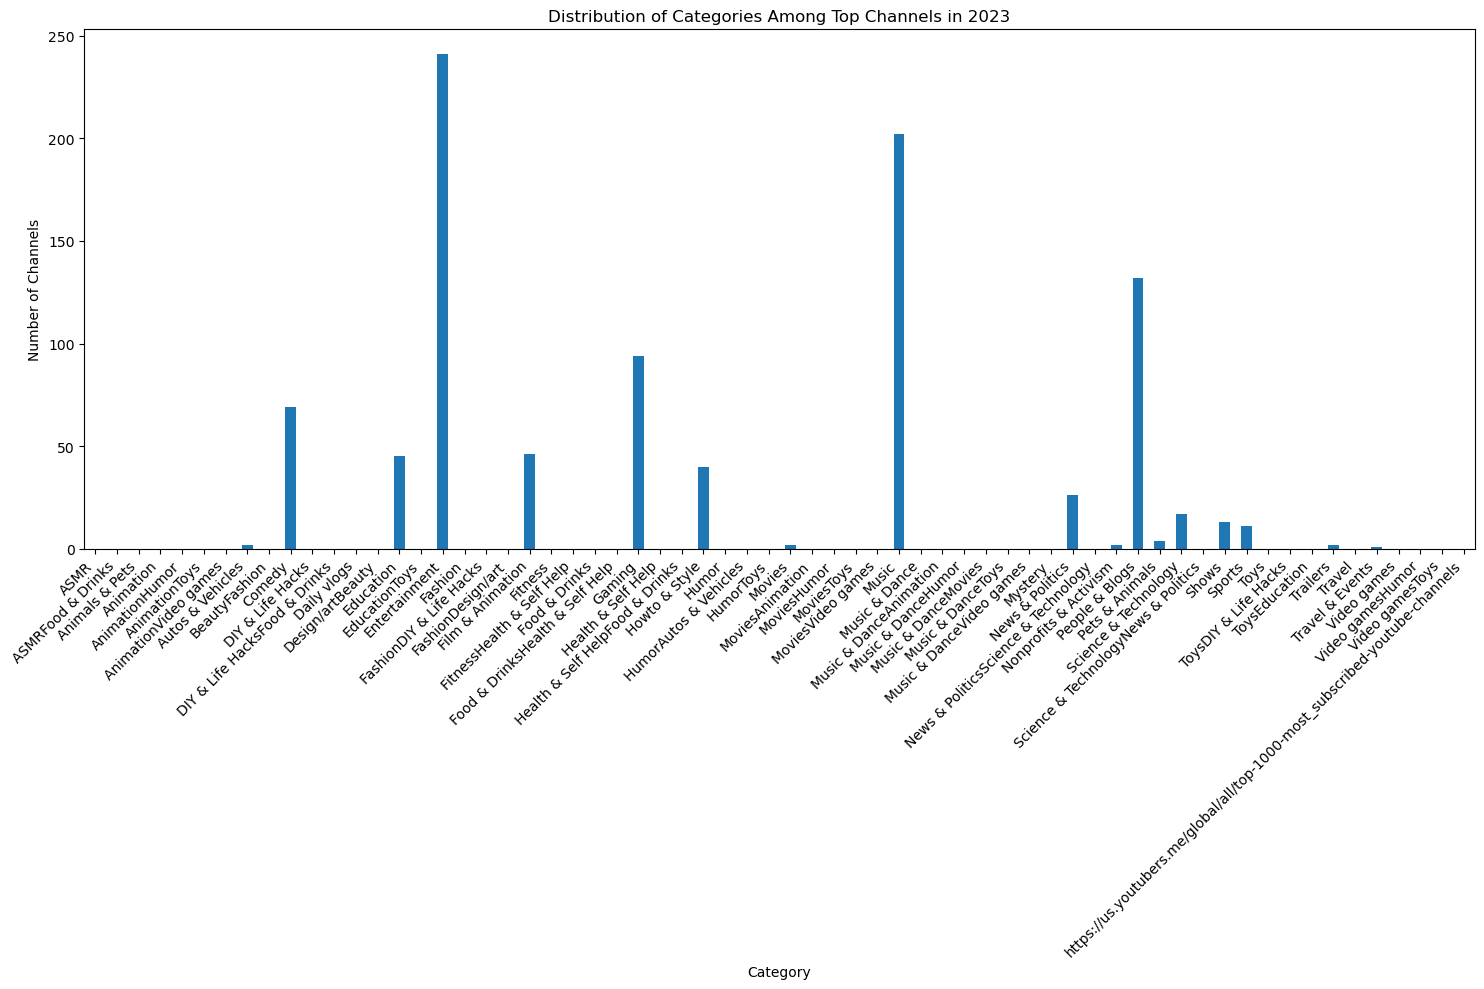

In [4]:
# Plot the distribution of categories for each year separately

# Plot for 2021
fig, ax = plt.subplots(figsize=(15, 10))
category_distribution.loc['2021'].plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Distribution of Categories Among Top Channels in 2021')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Channels')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot for 2022
fig, ax = plt.subplots(figsize=(15, 10))
category_distribution.loc['2022'].plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Distribution of Categories Among Top Channels in 2022')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Channels')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot for 2023
fig, ax = plt.subplots(figsize=(15, 10))
category_distribution.loc['2023'].plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Distribution of Categories Among Top Channels in 2023')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Channels')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [5]:
pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Assuming category_distribution is already calculated

# Define a function to plot category distribution for a given year
def plot_category_distribution(year):
    fig, ax = plt.subplots(figsize=(15, 10))
    category_distribution.loc[year].plot(kind='bar', ax=ax)
    ax.set_title(f'Distribution of Categories Among Top Channels in {year}')
    ax.set_xlabel('Category')
    ax.set_ylabel('Number of Channels')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Create a dropdown widget for selecting the year
year_selector = widgets.Dropdown(
    options=['2021', '2022', '2023'],
    value='2021',
    description='Year:',
)

# Use interact to create dynamic plots
interact(plot_category_distribution, year=year_selector)


interactive(children=(Dropdown(description='Year:', options=('2021', '2022', '2023'), value='2021'), Output())…

<function __main__.plot_category_distribution(year)>

In [17]:
import pandas as pd
import scipy.stats as stats

# Standardize column names for consistency
df21.columns = ['rank', 'channel', 'url', 'category', 'subscribers', 'country', 'avg_views', 'avg_likes', 'avg_comments']
df22.columns = ['rank', 'channel', 'subscribers', 'video_views', 'video_count', 'category', 'started']
df23.columns = ['rank', 'channel', 'subscribers', 'video_views', 'category', 'title', 'uploads', 'country', 'abbreviation', 'channel_type', 'other1', 'other2', 'other3', 'other4', 'other5', 'other6', 'other7', 'other8','subscribers_last_30_days', 'created_year', 'created_month', 'created_date', 'gross_tertiary_education_enrollment', 'population', 'unemployment_rate', 'urban_population', 'latitude', 'longitude']

# Ensure columns are numeric where appropriate
df21['avg_views'] = df21['avg_views'].apply(lambda x: float(x.replace('K', 'e3').replace('M', 'e6').replace('B', 'e9')) if isinstance(x, str) else float(x))
df22['video_views'] = df22['video_views'].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else float(x))
df23['video_views'] = df23['video_views'].apply(lambda x: float(x))

# Calculate average number of views per category for each year
avg_views_2021 = df21.groupby('category')['avg_views'].mean().reset_index()
avg_views_2022 = df22.groupby('category')['video_views'].mean().reset_index()
avg_views_2023 = df23.groupby('category')['video_views'].mean().reset_index()

# Rename columns for clarity
avg_views_2021.columns = ['category', 'avg_views_2021']
avg_views_2022.columns = ['category', 'avg_views_2022']
avg_views_2023.columns = ['category', 'avg_views_2023']

# Merge the dataframes to compare the average views
merged_avg_views = avg_views_2021.merge(avg_views_2022, on='category', how='outer').merge(avg_views_2023, on='category', how='outer')

# Display the merged dataframe
print(merged_avg_views)

# Perform statistical tests to determine if the differences are significant
anova_data = []
for category in merged_avg_views['category']:
    data_21 = df21[df21['category'] == category]['avg_views']
    data_22 = df22[df22['category'] == category]['video_views']
    data_23 = df23[df23['category'] == category]['video_views']
    
    # Perform ANOVA
    f_val, p_val = stats.f_oneway(data_21, data_22, data_23)
    anova_data.append({'category': category, 'f_value': f_val, 'p_value': p_val})

anova_results = pd.DataFrame(anova_data)

# Display the ANOVA results
print(anova_results)

                                             category  avg_views_2021  \
0                                                ASMR    1.700000e+06   
1                                   ASMRFood & Drinks    8.837000e+05   
2                                      Animals & Pets    3.173200e+06   
3                                           Animation    8.511792e+05   
4                                      AnimationHumor    1.770533e+06   
..                                                ...             ...   
59                                     Pets & Animals             NaN   
60                                              Shows             NaN   
61                                           Trailers             NaN   
62                                    Travel & Events             NaN   
63  https://us.youtubers.me/global/all/top-1000-mo...             NaN   

    avg_views_2022  avg_views_2023  
0              NaN             NaN  
1              NaN             NaN  
2           

C:\Anaconda\lib\site-packages\scipy\stats\_stats_py.py:3869: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [13]:
df23

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por A?,12300000,9.029610e+09,Sports,Natan por A?,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [18]:
data_2021 = pd.read_csv('21년top1000/21-top1000.csv')
data_2022 = pd.read_csv('22년top1000/22-top1000.csv')
data_2023 = pd.read_csv('23년top1000/23-top1000.csv')

In [19]:
# Processing data for 2021
data_2021_clean = data_2021[['Category', 'Avg. Views']].dropna()
data_2021_clean['Avg. Views'] = data_2021_clean['Avg. Views'].apply(lambda x: float(x.replace('K', 'e3').replace('M', 'e6').replace('B', 'e9')))

# Processing data for 2022
data_2022_clean = data_2022[['Category', 'Video Views']].dropna()
data_2022_clean['Video Views'] = data_2022_clean['Video Views'].apply(lambda x: float(str(x).replace(',', '')))

# Processing data for 2023
data_2023_clean = data_2023[['category', 'video views']].dropna()
data_2023_clean = data_2023_clean.rename(columns={'category': 'Category', 'video views': 'Video Views'})
data_2023_clean['Video Views'] = data_2023_clean['Video Views'].astype(float)


In [22]:
# Calculating average views per category for each year
average_views_2021 = data_2021_clean.groupby('Category')['Avg. Views'].mean().reset_index()
average_views_2022 = data_2022_clean.groupby('Category')['Video Views'].mean().reset_index()
average_views_2023 = data_2023_clean.groupby('Category')['Video Views'].mean().reset_index()

# Renaming columns for consistency
average_views_2021 = average_views_2021.rename(columns={'Avg. Views': 'Average Views'})
average_views_2022 = average_views_2022.rename(columns={'Video Views': 'Average Views'})
average_views_2023 = average_views_2023.rename(columns={'Video Views': 'Average Views'})

# Merging the dataframes to have a combined view
combined_data = average_views_2021.merge(average_views_2022, on='Category', suffixes=('_2021', '_2022'))
combined_data = combined_data.merge(average_views_2023, on='Category')
combined_data = combined_data.rename(columns={'Average Views': 'Average Views_2023'})

combined_data

,Category,Average Views_2021,Average Views_2022,Average Views_2023
0,Autos & Vehicles,5.036000e+05,7.666148e+09,7.501729e+09
1,Education,1.129667e+06,1.418033e+10,1.548032e+10
2,Movies,5.475333e+05,7.103285e+09,7.691628e+09
3,News & Politics,2.588694e+05,9.359919e+09,1.039969e+10
4,Science & Technology,1.903569e+06,3.666427e+09,3.939809e+09
5,Sports,2.758000e+05,1.283169e+10,1.345330e+10


In [27]:
# Performing one-way ANOVA test for each category separately
category_anova_results = {}

for category in combined_data['Category']:
    # Extracting data for each category
    data_2021_category = data_2021_clean[data_2021_clean['Category'] == category]['Avg. Views']
    data_2022_category = data_2022_clean[data_2022_clean['Category'] == category]['Video Views']
    data_2023_category = data_2023_clean[data_2023_clean['Category'] == category]['Video Views']
    
    # Skip categories with no data for the required years
    if len(data_2021_category) == 0 or len(data_2022_category) == 0 or len(data_2023_category) == 0:
        continue
    
    # Performing one-way ANOVA
    anova_result = f_oneway(data_2021_category, data_2022_category, data_2023_category)
    category_anova_results[category] = anova_result

# Creating a dataframe to display the results
category_anova_results_df = pd.DataFrame(category_anova_results).T
category_anova_results_df.columns = ['F-statistic', 'p-value']
category_anova_results_df.index.name = 'Category'


category_anova_results_df


,F-statistic,p-value
Category,,
Autos & Vehicles,2.437364,4.125781e-01
Education,5.520545,5.116057e-03
Movies,59.614925,2.831327e-07
News & Politics,99.299471,2.183679e-24
Science & Technology,17.317946,2.176409e-06
Sports,1.454577,2.518799e-01


C:\Users\kkksk\AppData\Local\Temp\ipykernel_18704\1010448423.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(categories, rotation=45, ha='right')


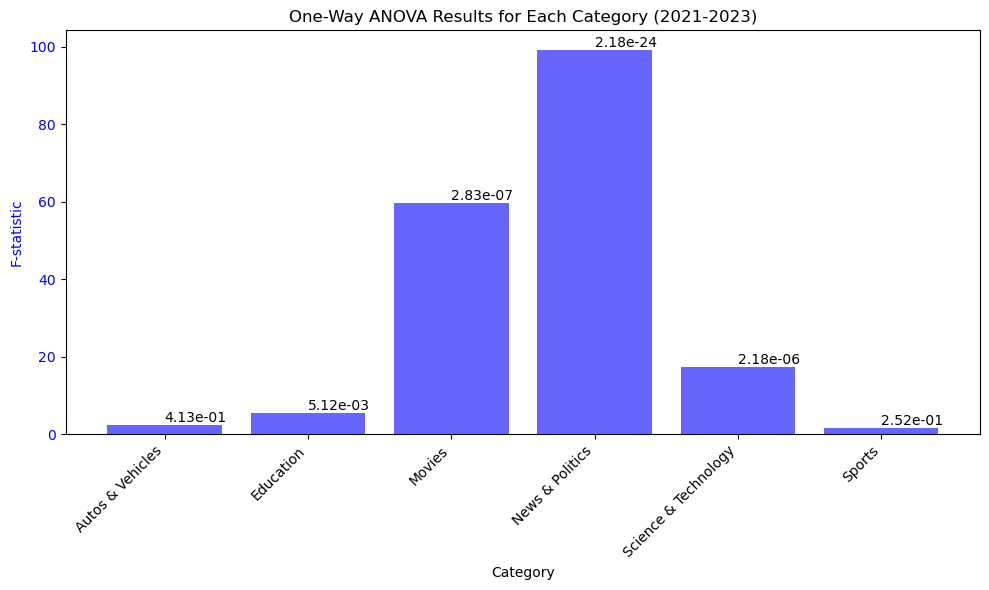

In [29]:
import matplotlib.pyplot as plt

# Data for visualization
categories = category_anova_results_df.index
f_statistics = category_anova_results_df['F-statistic']
p_values = category_anova_results_df['p-value']

# Creating the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for F-statistics
bars = ax1.bar(categories, f_statistics, color='b', alpha=0.6)

# Adding labels and title
ax1.set_xlabel('Category')
ax1.set_ylabel('F-statistic', color='b')
ax1.set_title('One-Way ANOVA Results for Each Category (2021-2023)')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(categories, rotation=45, ha='right')

# Adding p-values on top of bars
for bar, p_value in zip(bars, p_values):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, yval, f'{p_value:.2e}', va='bottom')

# Saving the plot
plt.tight_layout()

# Display the plot
plt.show()
